In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [36]:
path = "../data/M5_full.parquet"

df = pd.read_parquet(path)

In [81]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29


In [82]:
linhas_FOODS_1_001 = df[df['item_id'] == 'FOODS_1_001']
linhas_FOODS_1_001.head(20)

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
1612,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,2011-01-29
4661,FOODS_1_001_CA_2_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,2,2011-01-29
7710,FOODS_1_001_CA_3_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_3,CA,1,2011-01-29
10759,FOODS_1_001_CA_4_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_4,CA,0,2011-01-29
13808,FOODS_1_001_TX_1_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,0,2011-01-29
16857,FOODS_1_001_TX_2_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_2,TX,0,2011-01-29
19906,FOODS_1_001_TX_3_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_3,TX,0,2011-01-29
22955,FOODS_1_001_WI_1_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,0,2011-01-29
26004,FOODS_1_001_WI_2_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_2,WI,0,2011-01-29
29053,FOODS_1_001_WI_3_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_3,WI,0,2011-01-29


In [83]:
# Olhando infos básicas

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   value     int16   
 7   date      object  
dtypes: category(6), int16(1), object(1)
memory usage: 1017.2+ MB


In [85]:
df['date'].min()

'2011-01-29'

In [86]:
df['date'].max()

'2016-05-22'

In [87]:
df.shape

(59181090, 8)

In [88]:
df['item_id'].nunique()

3049

In [89]:
df['item_id'].nunique()

3049

In [90]:
df['dept_id'].unique()

['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']
Categories (7, object): ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']

In [91]:
df['cat_id'].unique()

['HOBBIES', 'HOUSEHOLD', 'FOODS']
Categories (3, object): ['FOODS', 'HOBBIES', 'HOUSEHOLD']

In [92]:
df['store_id'].unique()

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']

In [93]:
df['state_id'].unique()

['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']

In [94]:
df['value'].nunique()

419

In [95]:
# Agrupando a base por mês (ela tá por dia)

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df['year_month'] = df['date'].dt.to_period('M')

# grouped_df = df.groupby(['item_id', 'year_month']).reset_index()

# grouped_df['year_month'] = grouped_df['year_month'].dt.to_timestamp()

### Análise categórica


#### Vendas por categoria


In [21]:
df_cat = df.groupby(['cat_id','date'])['value'].sum().reset_index().set_index('date')

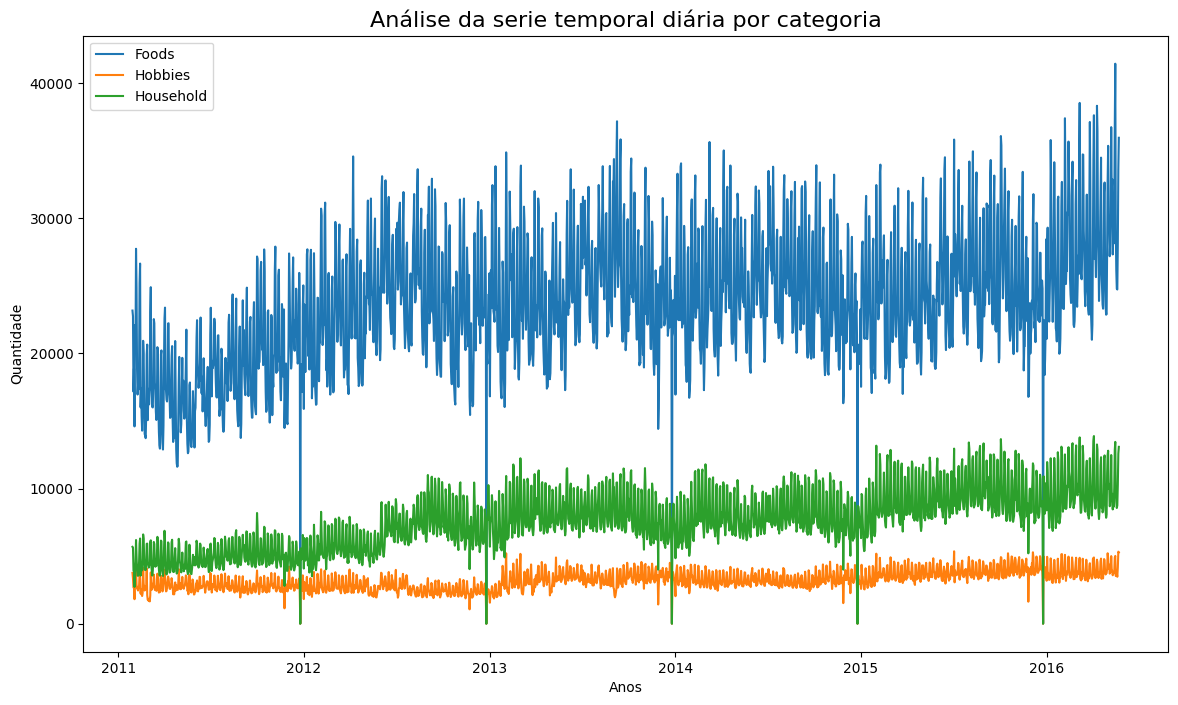

In [22]:
def plot_category(ax, df, category, label):
    subset = df[df['cat_id'] == category]
    ax.plot(subset['value'], label=label)

fig, ax = plt.subplots(figsize=(14, 8))

categories = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
labels = ['Foods', 'Hobbies', 'Household']

for category, label in zip(categories, labels):
    plot_category(ax, df_cat, category, label)

ax.set_title('Análise da serie temporal diária por categoria', fontsize=16)
ax.set_xlabel('Anos')
ax.set_ylabel('Quantidade') 

ax.legend()

plt.show()

#### Respondendo algumas perguntas exploratórias sobre o dataset


In [23]:
def plot_cats(cat):
    df_grouped = df.groupby(cat)['value'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    plt.bar(df_grouped[cat], df_grouped['value'])

    plt.title(f'Quantidade de vendas por {cat}')
    plt.xlabel(cat)
    plt.ylabel('Vendas')

    plt.xticks(rotation=45)

    plt.show()

##### Que estado vende mais?
##### Resposta: O estado da California vende mais, mas talvez seja porque é o estado com maior população da base

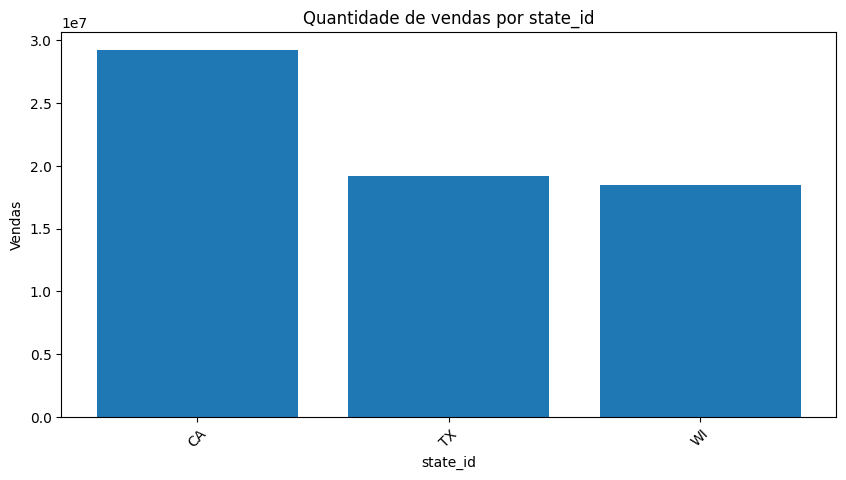

In [24]:
plot_cats('state_id')

##### Que categoria vende mais?
##### Resposta: A categoria que mais vende é o Foods

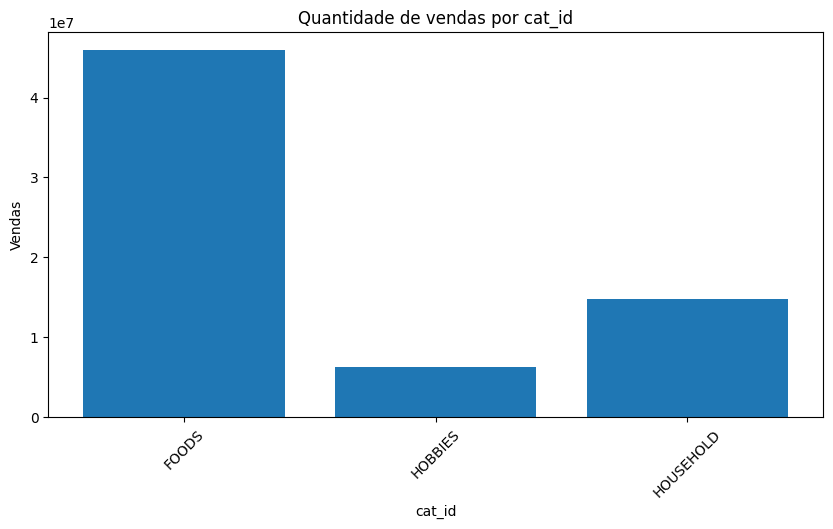

In [25]:
plot_cats('cat_id')

##### Que loja vende mais?
##### Resposta: A loja que mais vende é a CA_3, mas é importante perceber que Winsconsin é um estado quase 8x menor que a California e duas de suas lojas performaram quase tão bem quanto a segunda melhor loja do maior estado do dataset.

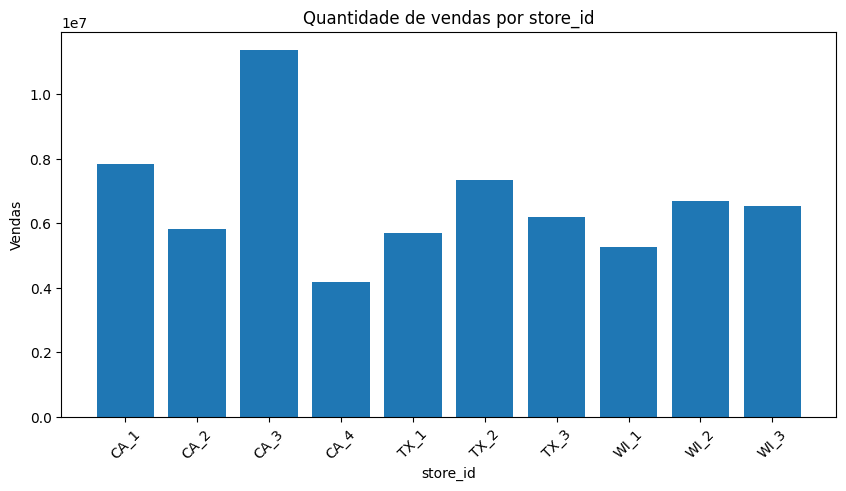

In [26]:
plot_cats('store_id')

#### Qual o departamento que mais vendeu?
#### De longe, o deparatamento que mais vendeu foi o de comida.

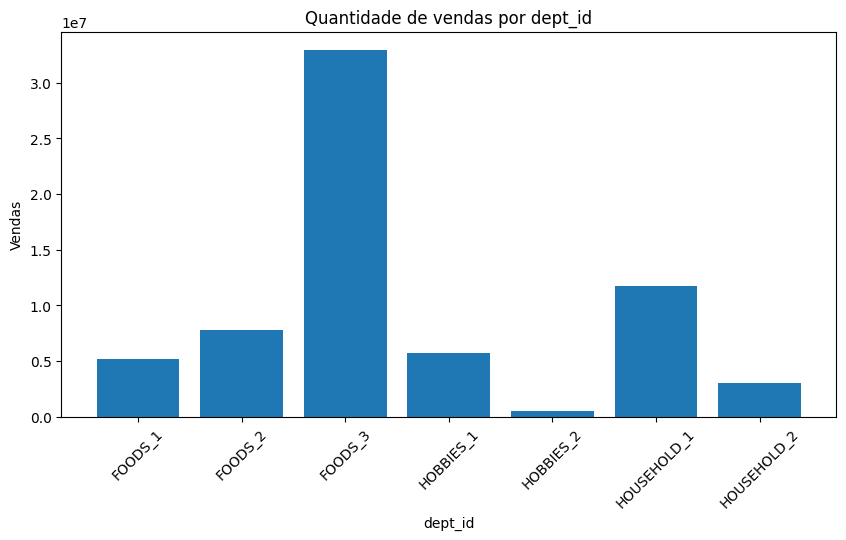

In [27]:
plot_cats('dept_id')

##### Quantos itens tem cada departamento?
##### Resposta: O departamento de FOOD_3 possui o maior número de itens.

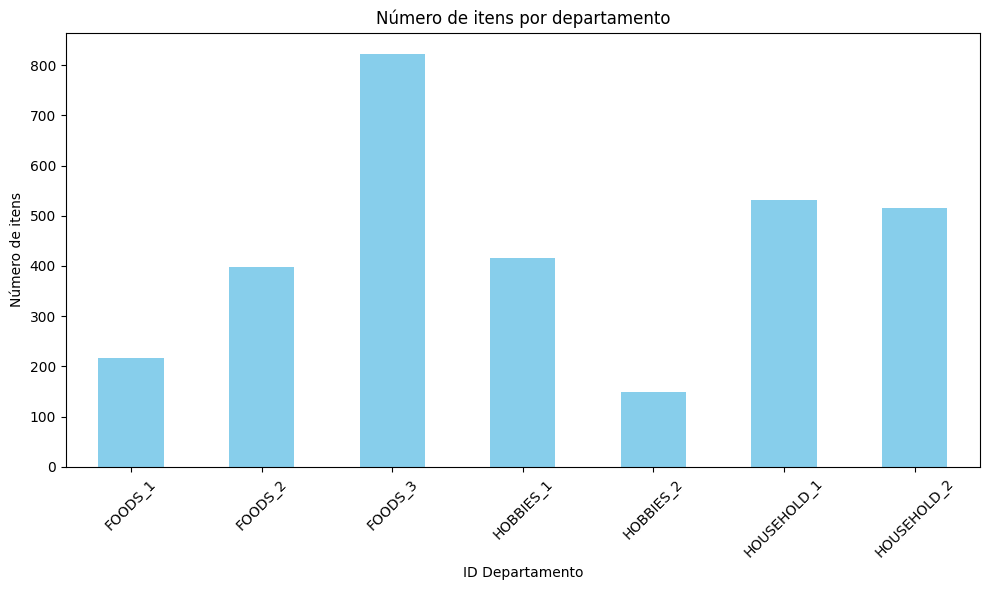

In [28]:
item_counts = df.groupby('dept_id')['item_id'].nunique()

plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Número de itens por departamento')
plt.xlabel('ID Departamento')
plt.ylabel('Número de itens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Que loja tem a maior quantidade de itens?
#### Resposta: Todas tem a mesma quantidade de itens.

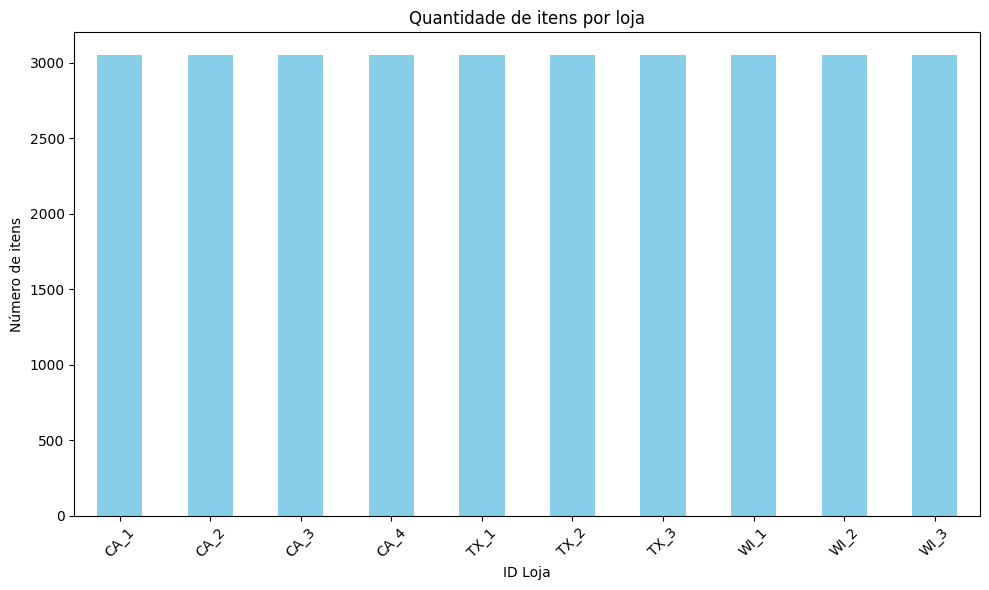

In [29]:
item_counts = df.groupby('store_id')['item_id'].nunique()

plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Quantidade de itens por loja')
plt.xlabel('ID Loja')
plt.ylabel('Número de itens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusão:
#### Come essa análise exploratória, é possível perceber que o setor mais produtivo de vendas dessa loja é o alimentício. A California é o estado que mais gera renda pra empresa, apesar de Winsconsin possuir a maior quantidade de vendas percapta.

### Plotamos as series e percebemos que a grande maioria tem uma trend positiva e um comportamento similar entre as categorias

In [30]:
cats = ['dept_id','cat_id','store_id','state_id']

In [68]:
def plot_series(column):
    df_grouped = df.groupby([column,'year_month'])['value'].sum().reset_index().set_index('year_month')

    cats = list(df[column].unique())
    
    for cat in cats:
        plt.figure(figsize=(10, 6))
        filtered_df = df_grouped[df_grouped[column] == cat]
        filtered_df['value'].plot()
        
        plt.title(f'Vendas pra {column}: {cat}')
        plt.xlabel('Ano')
        plt.ylabel('Total de vendas')
        plt.grid(True)
        plt.show()

#### Séries das categorias

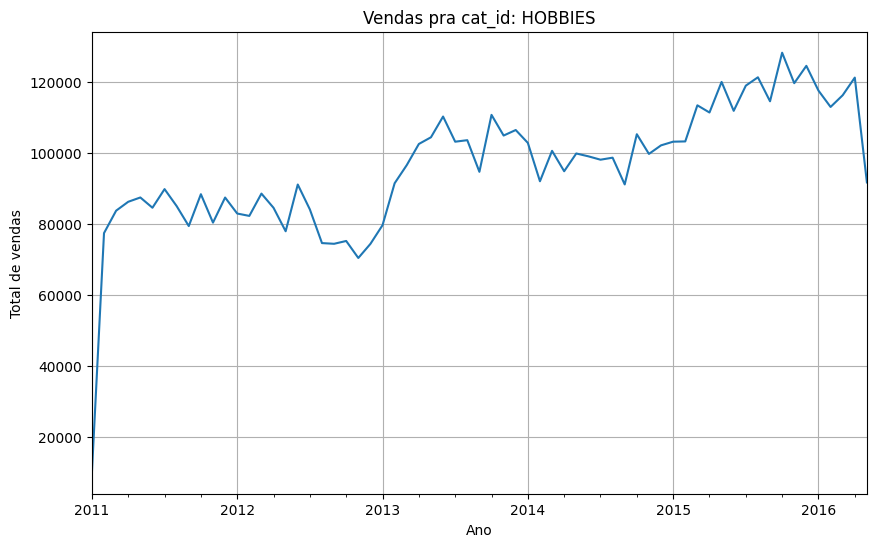

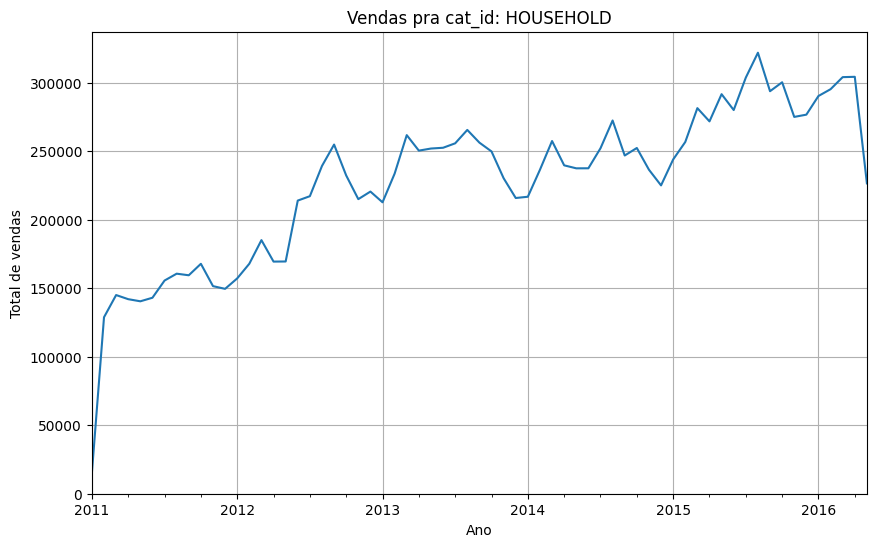

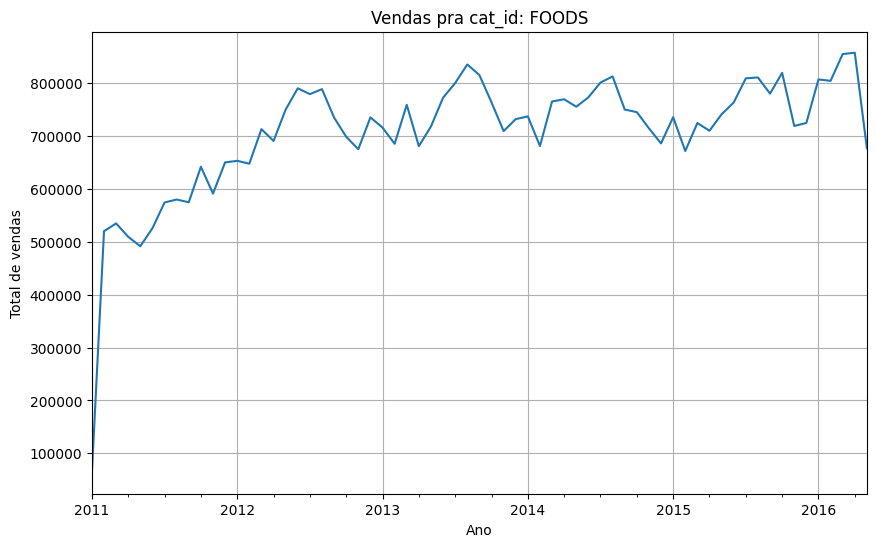

In [69]:
plot_series('cat_id')

#### Séries dos estados

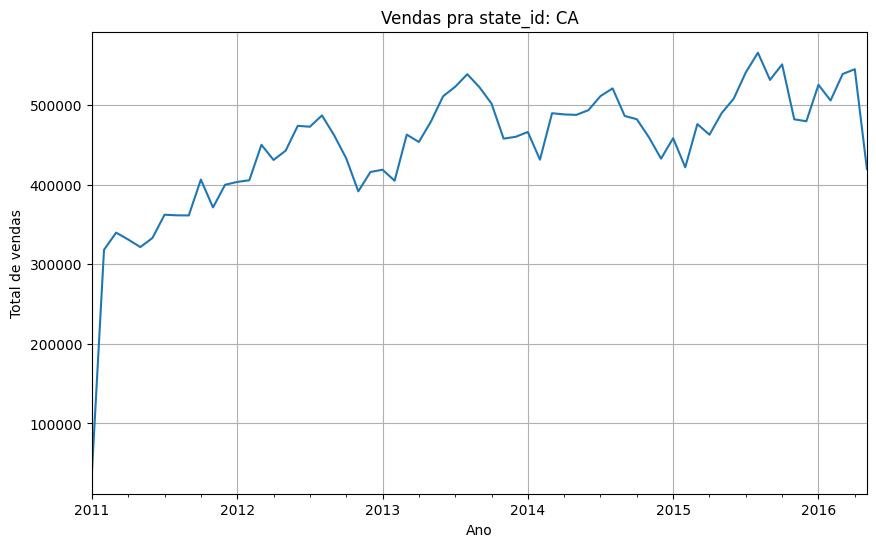

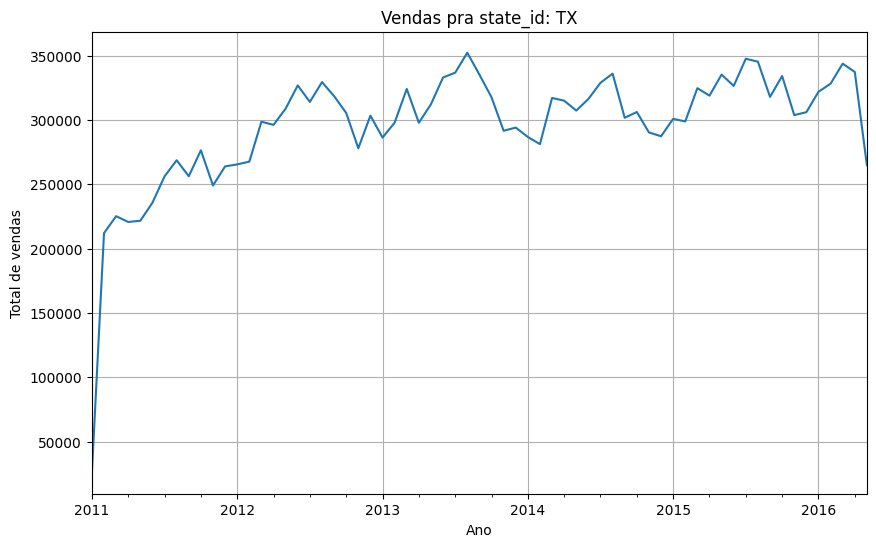

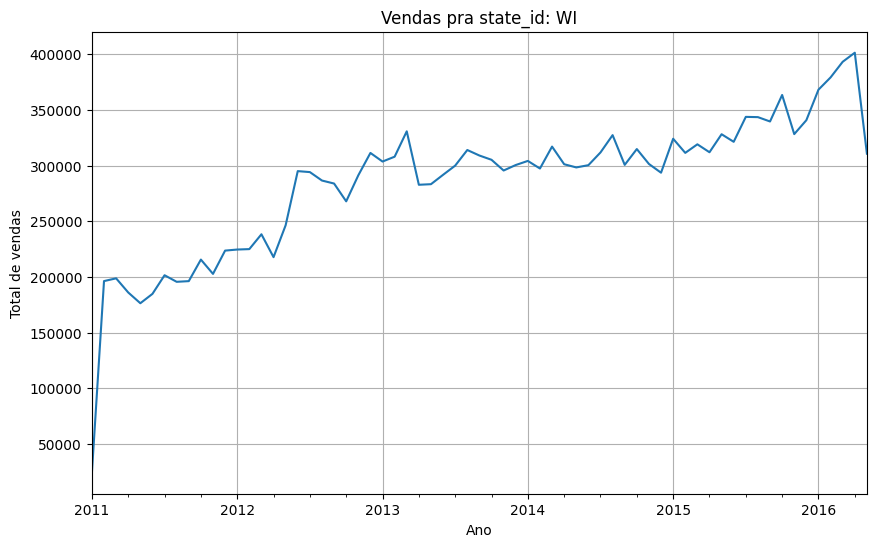

In [70]:
plot_series('state_id')

#### Séries das lojas

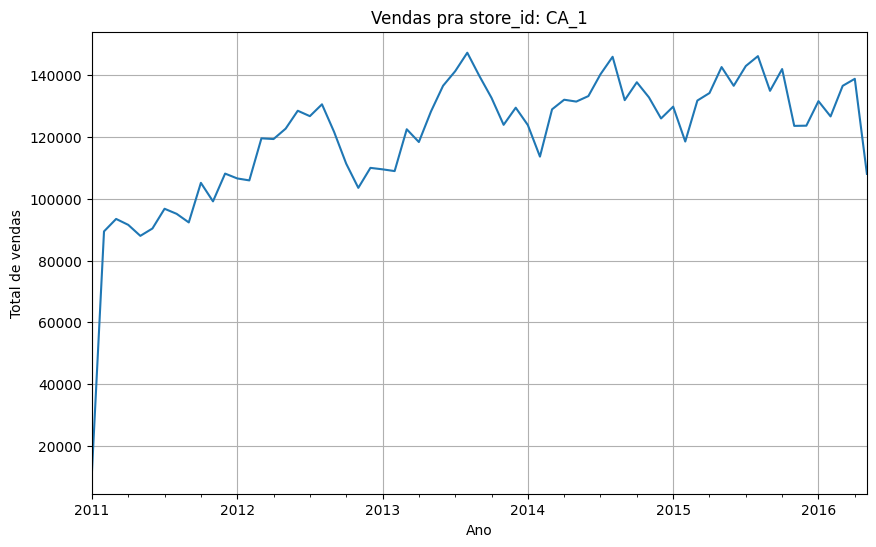

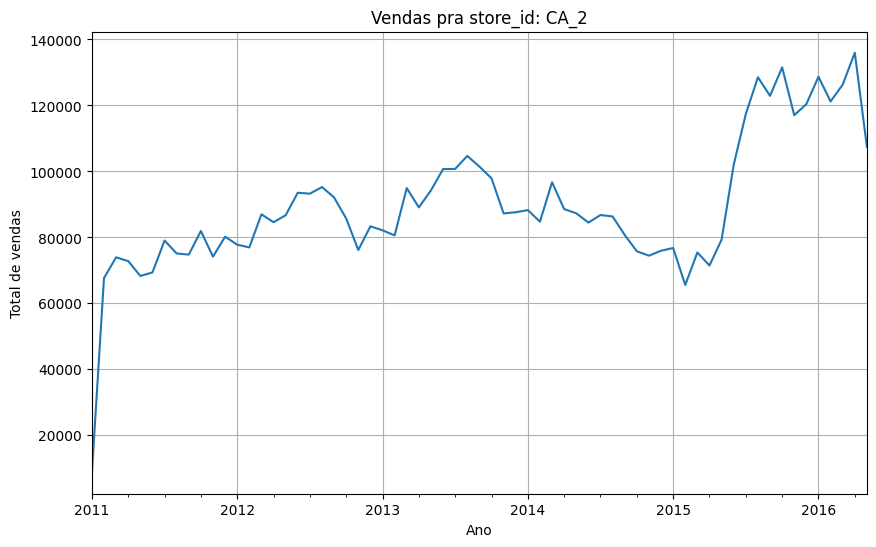

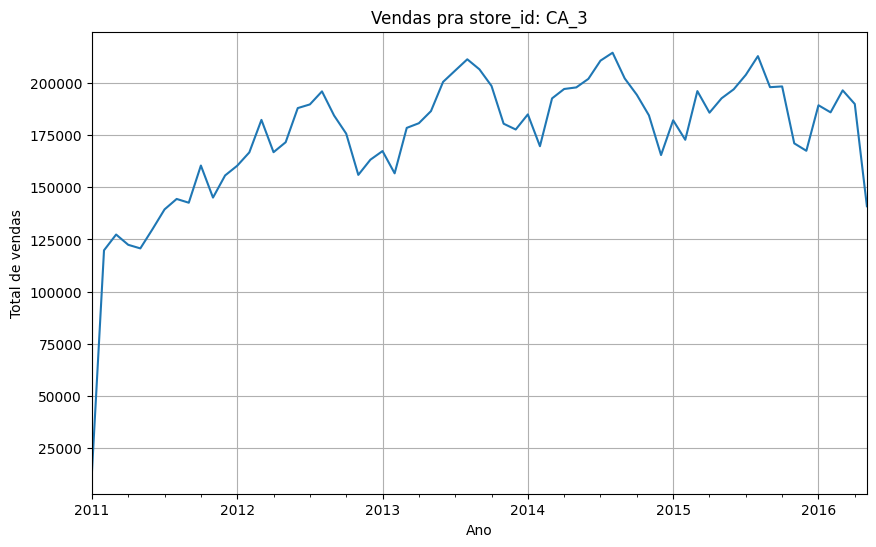

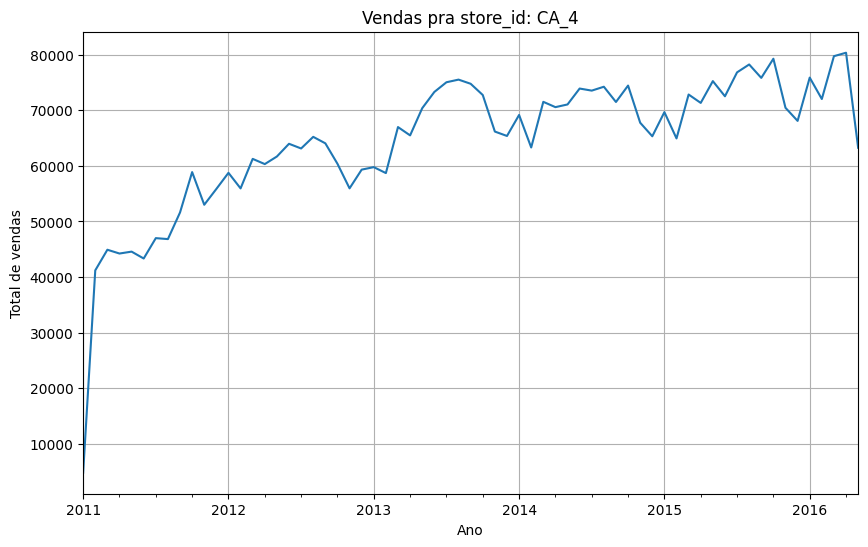

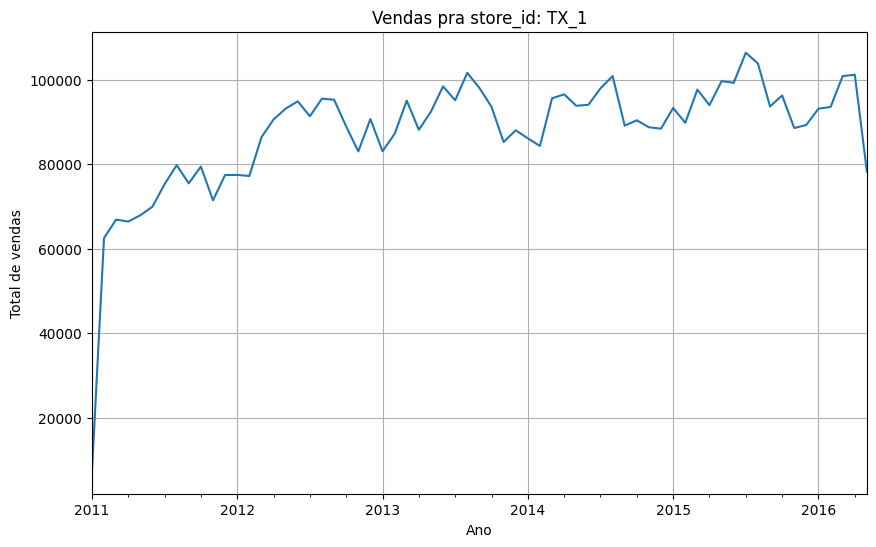

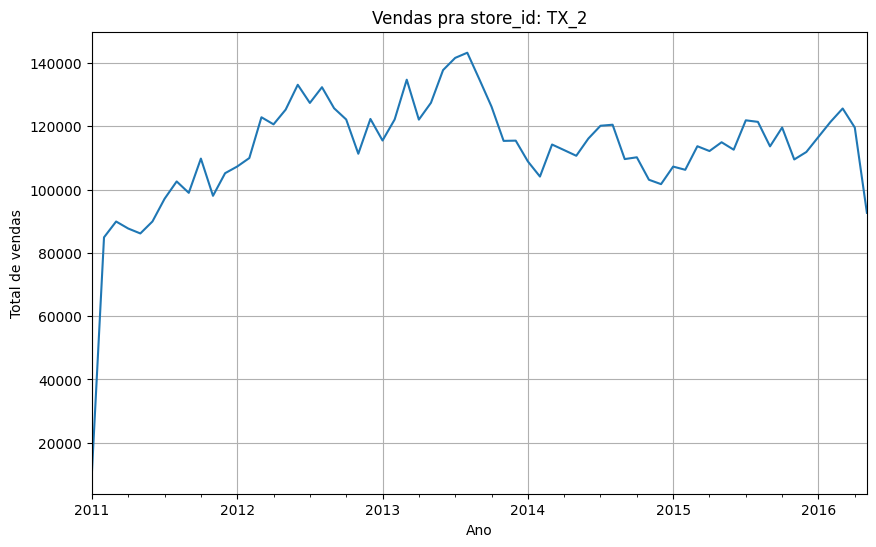

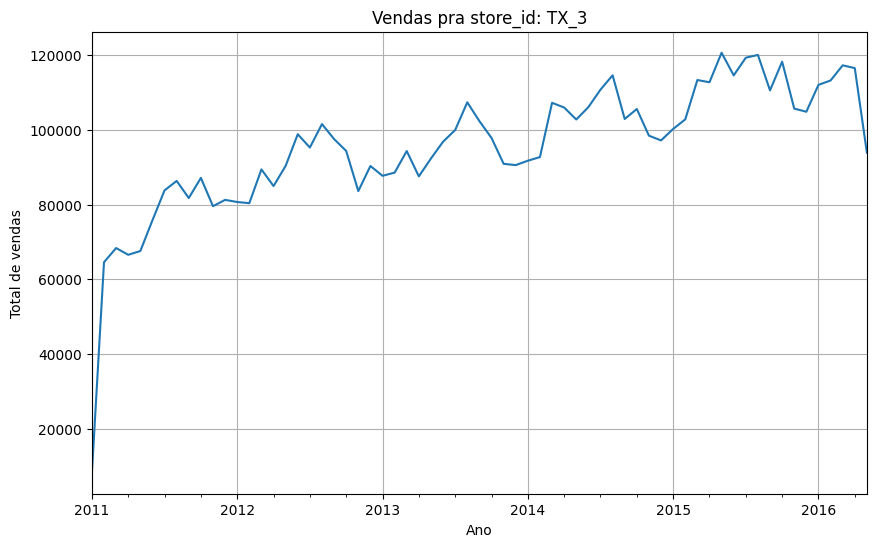

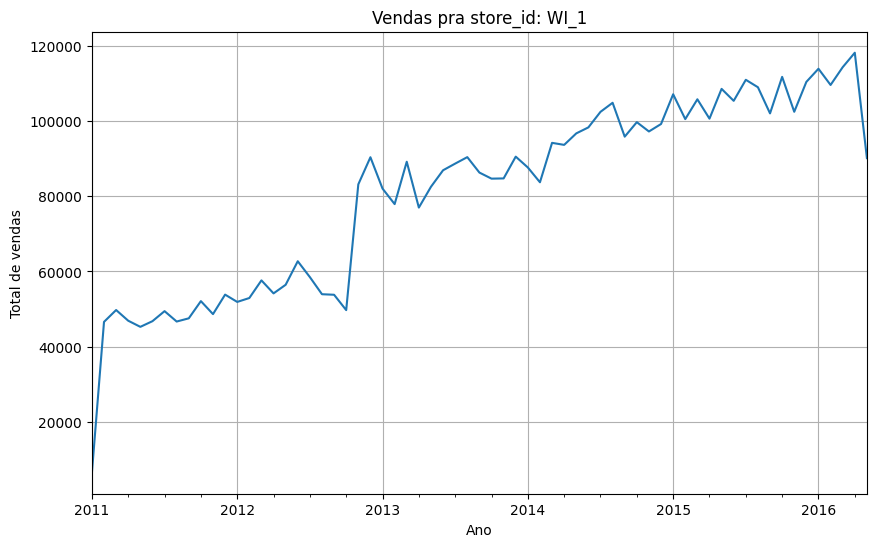

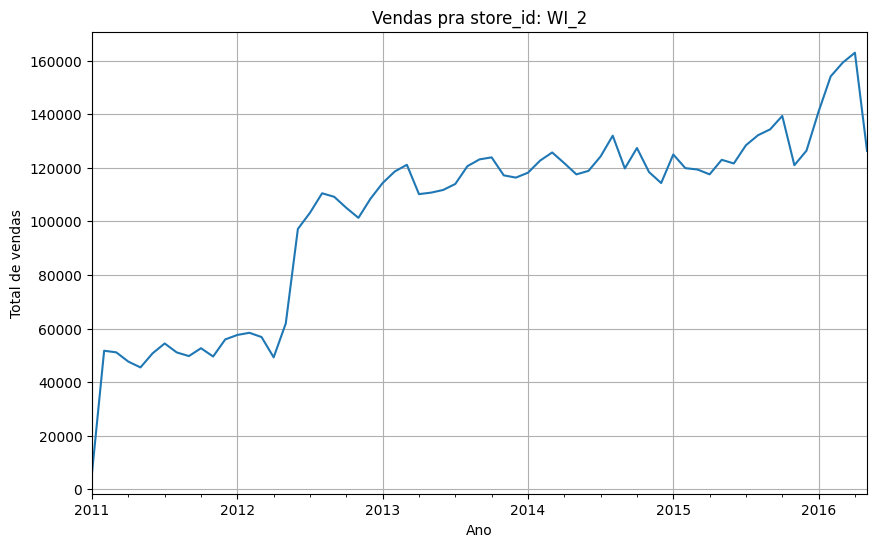

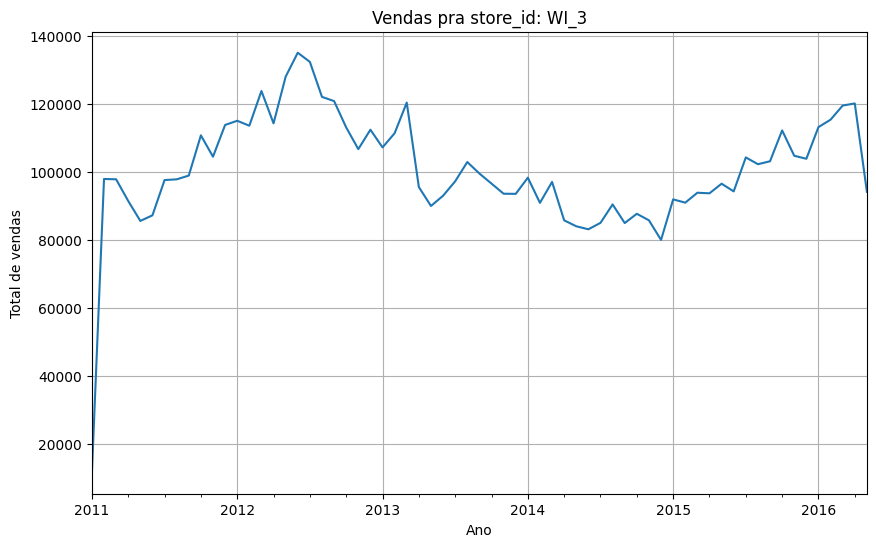

In [71]:
plot_series('store_id')

#### Séries dos departamentos

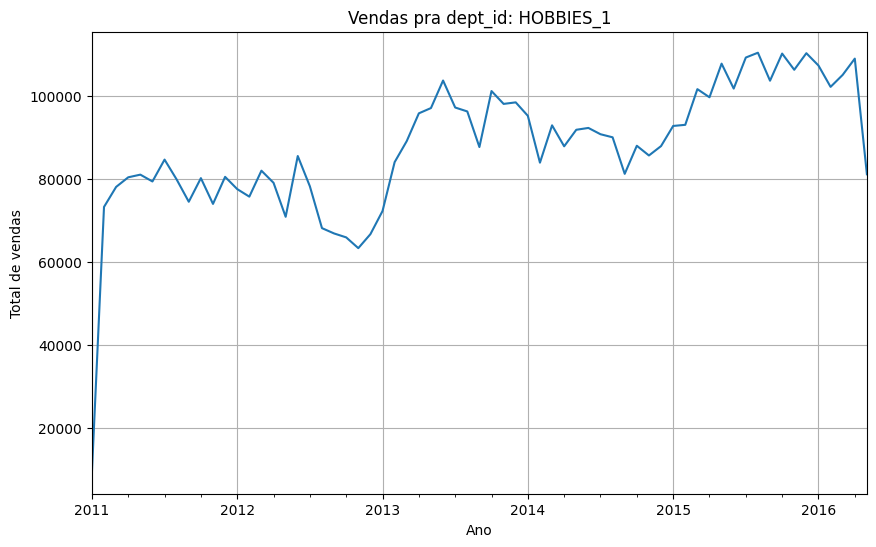

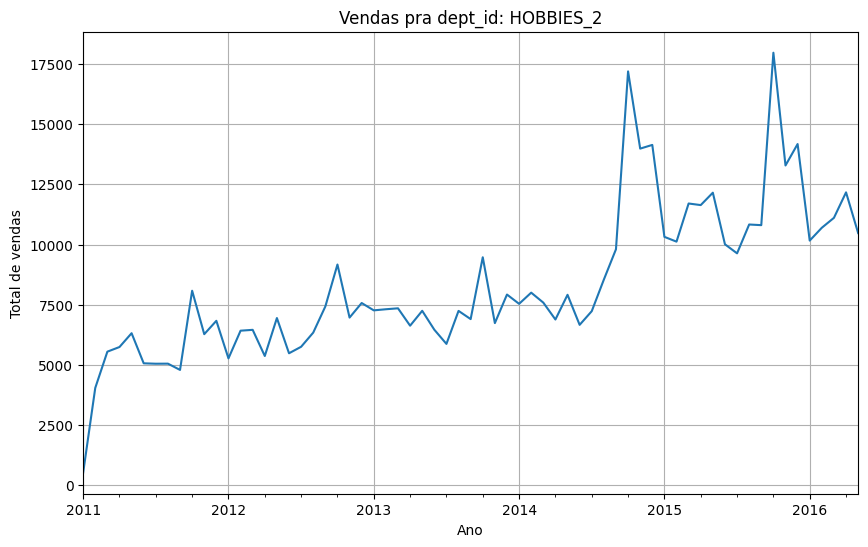

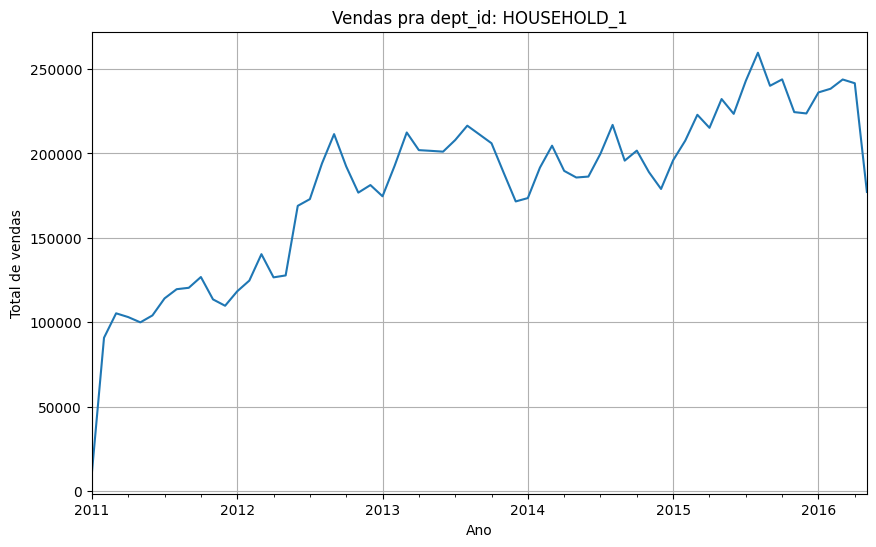

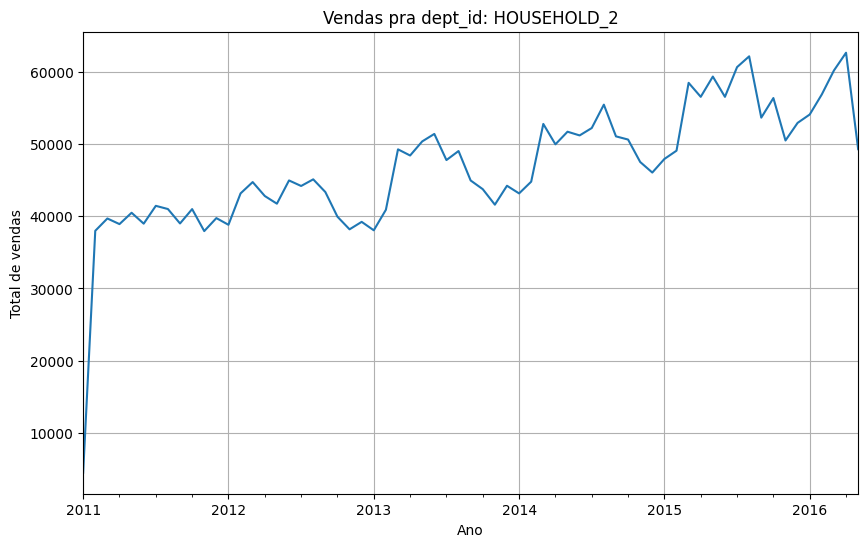

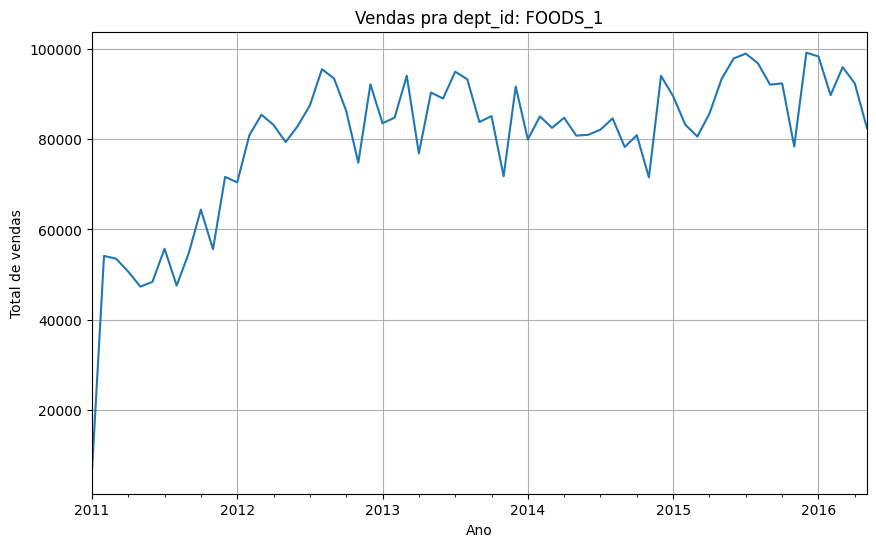

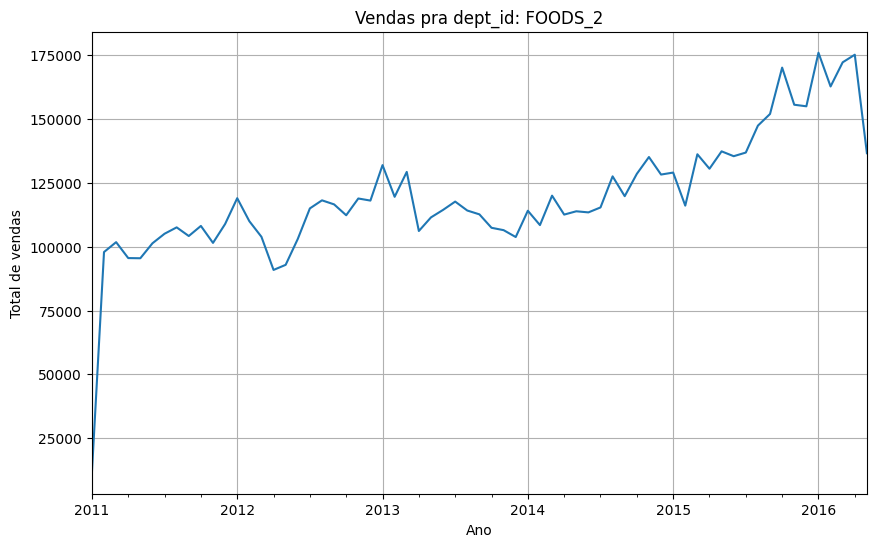

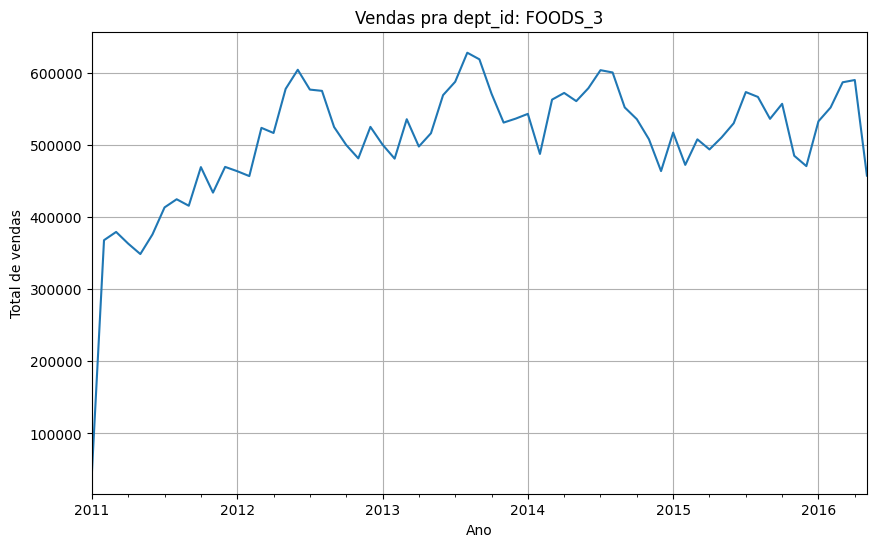

In [72]:
plot_series('dept_id')

### Top 10 itens por categoria

In [26]:
def get_top_items(grouped_df):
    top_items = grouped_df.groupby('cat_id').apply(lambda x: x.nlargest(10, 'value')).reset_index(drop=True)
    return top_items[['cat_id', 'item_id', 'value']]

In [28]:
import re

def remover_dois_apos_sublinhado(s):
    return re.sub(r'_(..)', '_', s)

In [9]:
# seria só um gráfico com todos os 10 plots, mas achei muito poluído.

# def plot_item_series(items):
#     df_grouped = df.groupby(['item_id','year_month'])['value'].sum().reset_index()
#     df_grouped['year_month'] = df_grouped['year_month'].dt.to_timestamp()

#     plt.figure(figsize=(12, 5))

#     for item in items:
#         df_grouped_item = df_grouped[df_grouped['item_id'] == item].set_index('year_month')
#         df_grouped_item = df_grouped_item.sort_values(by='year_month')
        
#         plt.plot(df_grouped_item.index, df_grouped_item['value'], label=item)

#     plt.title('Série Temporal para Top 10 Itens Alimentares')
#     plt.xlabel('Data')
#     plt.ylabel('Valor')
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.show()

##### Se o departamento importar

In [39]:
# vendo os itens mais vendidos

df_categorys = df
df_categorys['date'] = pd.to_datetime(df_categorys['date'])
df_categorys['year_month'] = df_categorys['date'].dt.to_period('M')

grouped_df = df_categorys.groupby(['item_id']).agg({'value': 'sum', 'cat_id' : 'first'}).reset_index()
grouped_df_with_cat = grouped_df.sort_values(by='value', ascending=False)

In [40]:
grouped_df_with_cat.head()

,item_id,value,cat_id
702,FOODS_3_090,1017916,FOODS
1198,FOODS_3_586,932236,FOODS
864,FOODS_3_252,573723,FOODS
1167,FOODS_3_555,497881,FOODS
1199,FOODS_3_587,402159,FOODS


In [41]:
top_items = get_top_items(grouped_df_with_cat)
top_items

,cat_id,item_id,value
0,FOODS,FOODS_3_090,1017916
1,FOODS,FOODS_3_586,932236
2,FOODS,FOODS_3_252,573723
3,FOODS,FOODS_3_555,497881
4,FOODS,FOODS_3_587,402159
5,FOODS,FOODS_3_714,402111
6,FOODS,FOODS_3_694,395937
7,FOODS,FOODS_3_226,368369
8,FOODS,FOODS_3_202,300529
9,FOODS,FOODS_3_120,290132


In [42]:
top_10_foods_itens = ['FOODS_3_090', 'FOODS_3_586', 'FOODS_3_252', 'FOODS_3_555', 'FOODS_3_587', 'FOODS_3_714', 'FOODS_3_694',
                      'FOODS_3_226', 'FOODS_3_202', 'FOODS_3_120']
top_10_hobbies_itens = ['HOBBIES_1_371', 'HOBBIES_1_348', 'HOBBIES_1_268', 'HOBBIES_1_341', 'HOBBIES_1_178', 'HOBBIES_1_370',
                        'HOBBIES_1_008', 'HOBBIES_1_254', 'HOBBIES_1_015', 'HOBBIES_1_256']
top_10_household_itens = ['HOUSEHOLD_1_334', 'HOUSEHOLD_1_459', 'HOUSEHOLD_1_521', 'HOUSEHOLD_1_303', 'HOUSEHOLD_1_110',
                          'HOUSEHOLD_1_327', 'HOUSEHOLD_1_083' ,'HOUSEHOLD_1_019', 'HOUSEHOLD_1_234', 'HOUSEHOLD_1_118']

In [ ]:
# função para plotar as séries

def plot_item_series(item):
    df_grouped = df.groupby(['item_id','year_month'])['value'].sum().reset_index()
    df_grouped['year_month'] = df_grouped['year_month'].dt.to_timestamp()

    df_grouped_item = df_grouped[df_grouped['item_id'] == item].set_index('year_month')
    df_grouped_item = df_grouped_item.sort_values(by='year_month')

    plt.figure(figsize=(12, 5))
    plt.plot(df_grouped_item.index, df_grouped_item['value'])

    plt.title(f'Série {item}')
    plt.xlabel('Data')
    plt.ylabel('Valor')

    plt.xticks(rotation=45)

    plt.show()

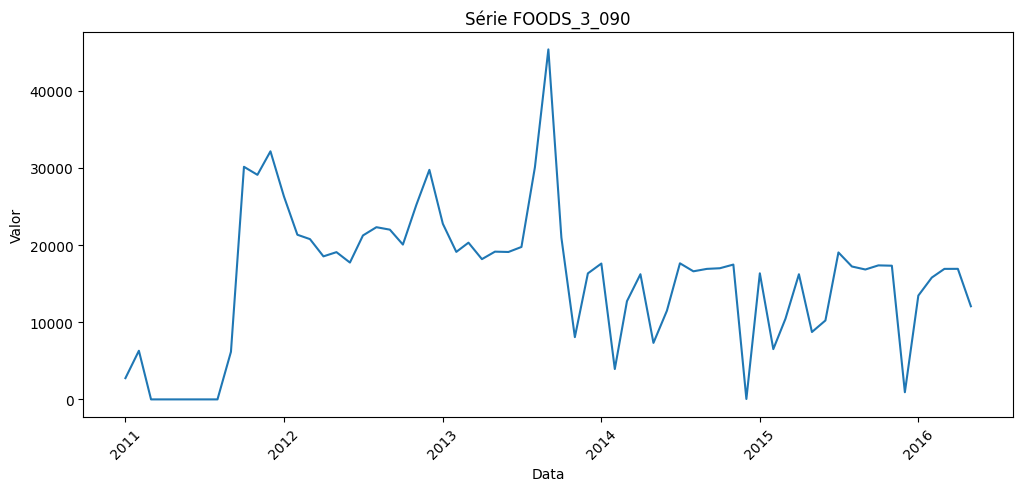

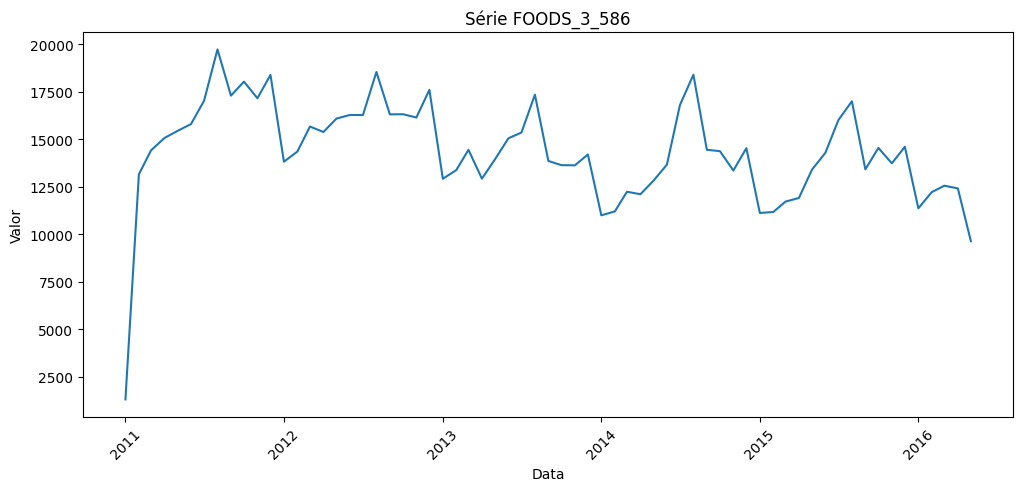

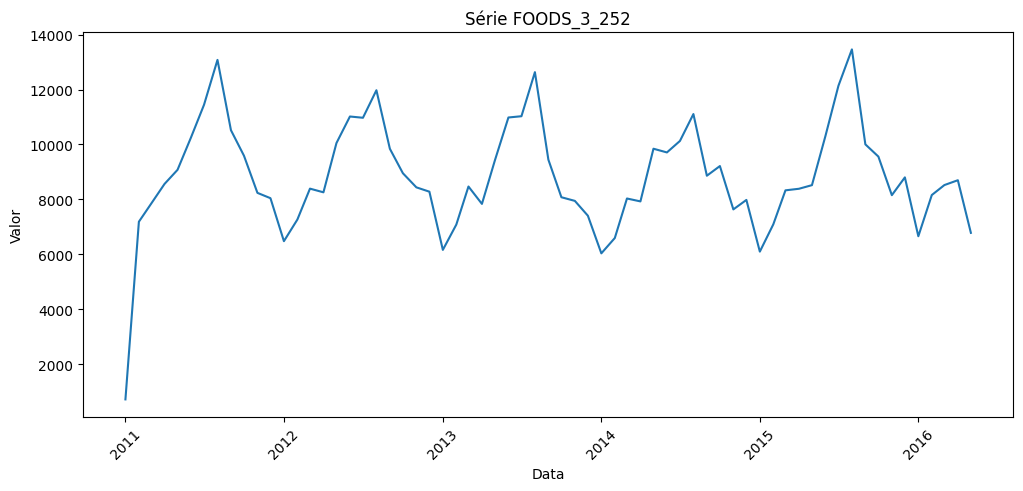

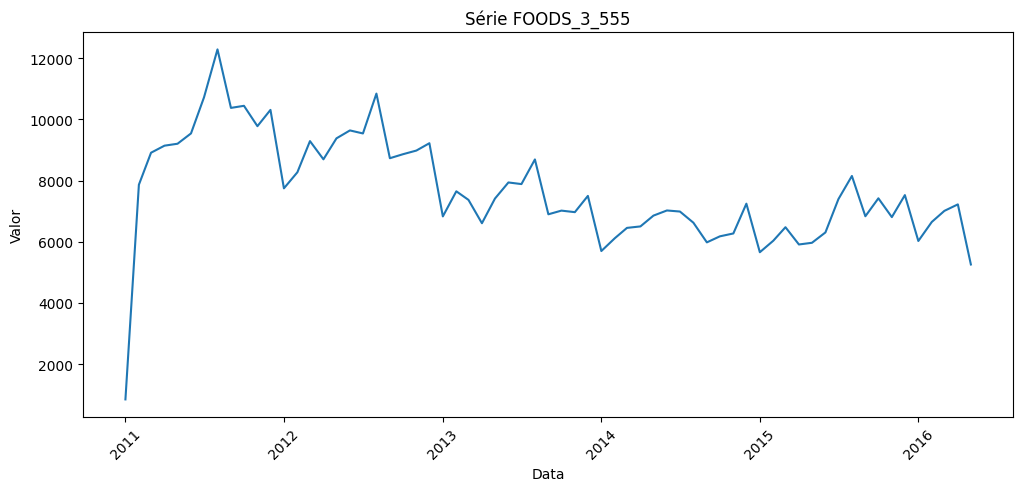

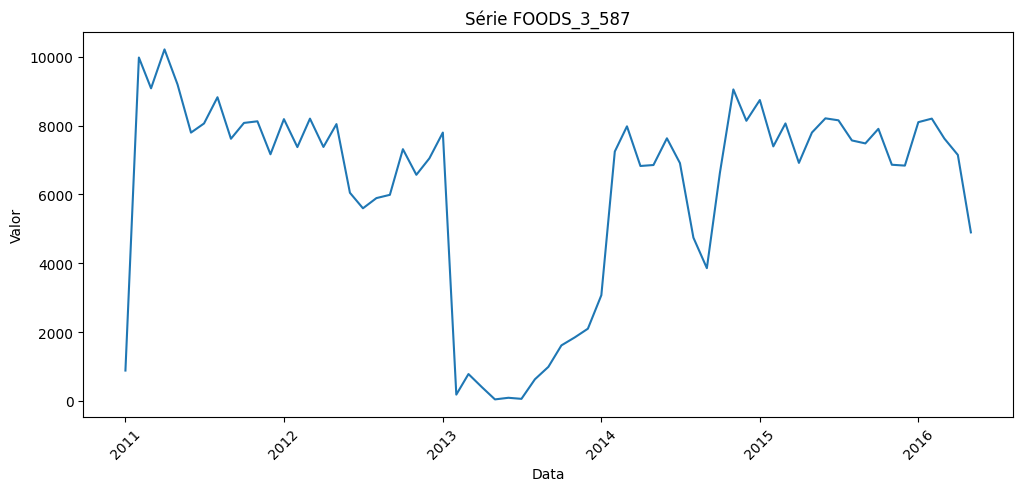

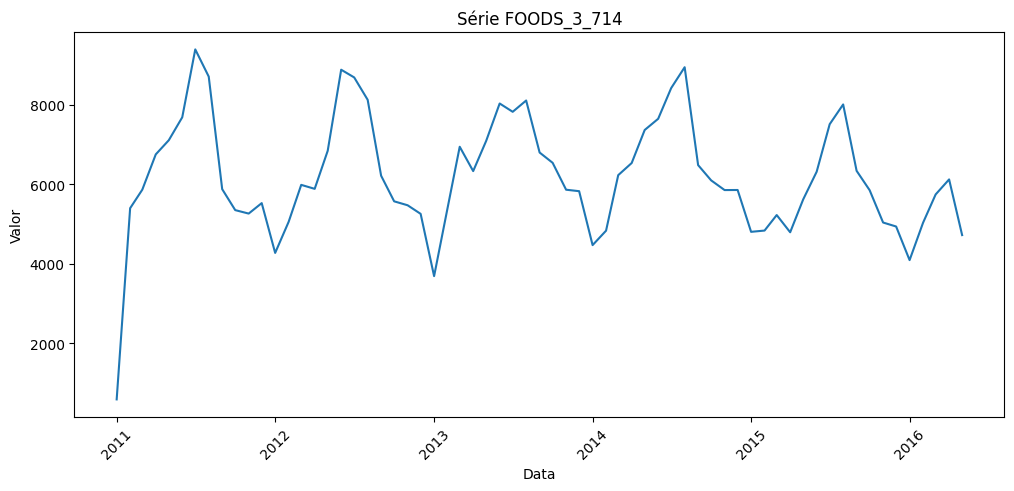

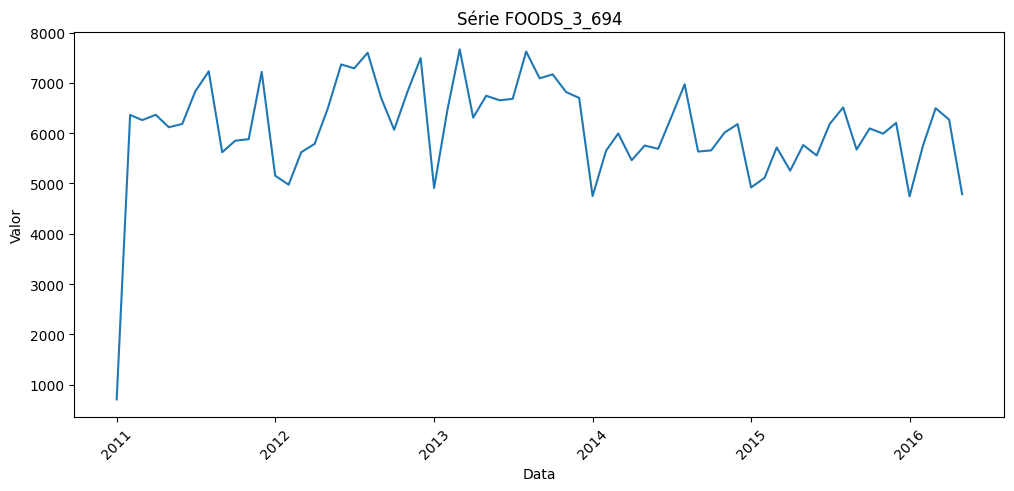

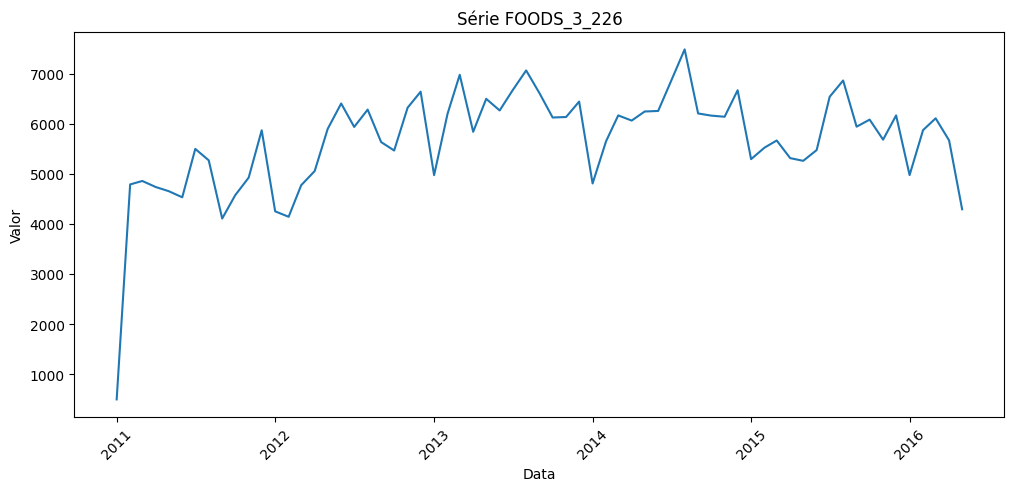

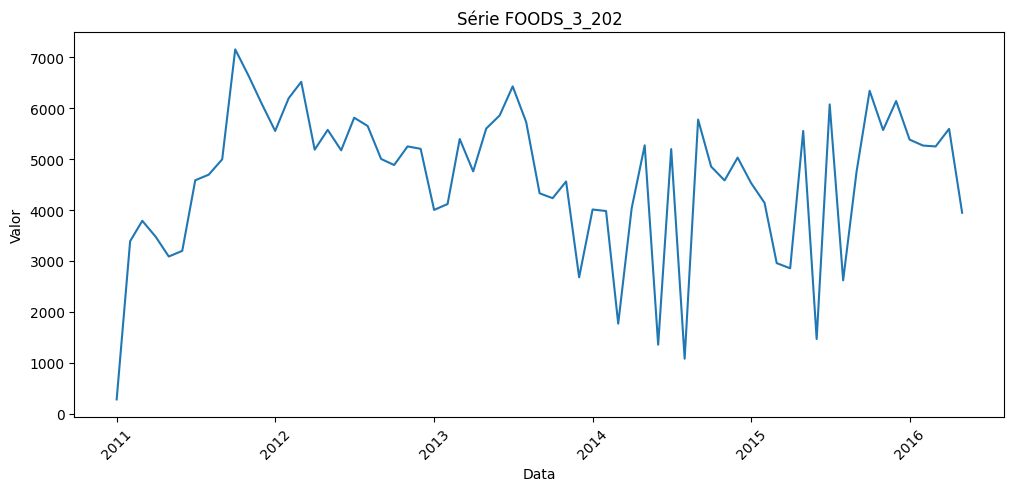

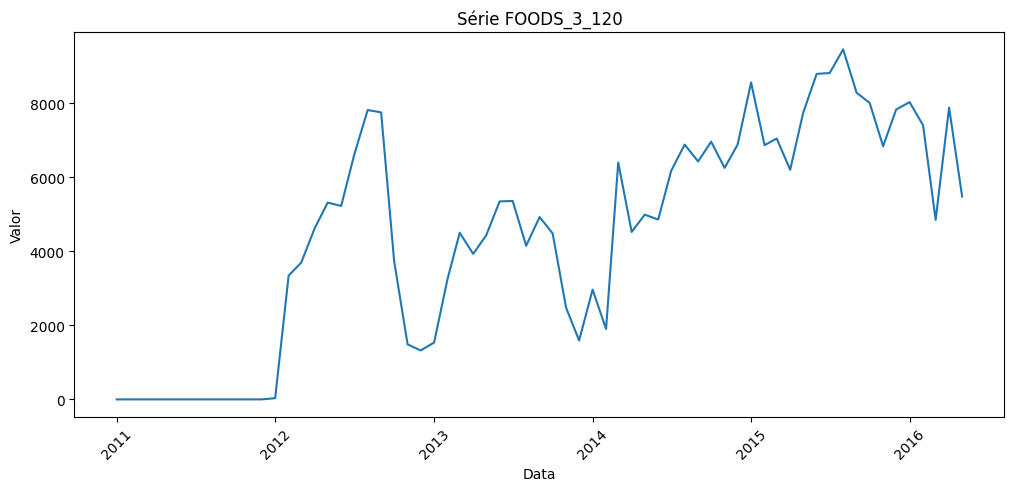

In [43]:
for item in top_10_foods_itens:
    plot_item_series(item)

##### Se o departamento não importar

In [14]:
# vendo quais são os itens mais vendidos
grouped_df_without_cat = grouped_df
grouped_df_without_cat['item_id'] = grouped_df_without_cat['item_id'].apply(remover_dois_apos_sublinhado)
grouped_df_without_cat = grouped_df_without_cat.groupby(['item_id']).agg({'value': 'sum', 'cat_id' : 'first'}).reset_index()

In [15]:
grouped_df_without_cat = grouped_df_without_cat.sort_values(by='value', ascending=False)

In [16]:
grouped_df_without_cat.head()

,item_id,value,cat_id
89,FOODS_090,1032460,FOODS
585,FOODS_586,932236,FOODS
251,FOODS_252,575152,FOODS
554,FOODS_555,497881,FOODS
586,FOODS_587,402159,FOODS


In [17]:
top_items = get_top_items(grouped_df_without_cat)
top_items

,cat_id,item_id,value
0,FOODS,FOODS_090,1032460
1,FOODS,FOODS_586,932236
2,FOODS,FOODS_252,575152
3,FOODS,FOODS_555,497881
4,FOODS,FOODS_587,402159
5,FOODS,FOODS_714,402111
6,FOODS,FOODS_694,395937
7,FOODS,FOODS_226,370003
8,FOODS,FOODS_202,327371
9,FOODS,FOODS_120,325627


In [18]:
top_10_foods_itens = ['FOODS_090', 'FOODS_586', 'FOODS_252', 'FOODS_555', 'FOODS_587', 'FOODS_714', 'FOODS_694'
                      ,'FOODS_226', 'FOODS_202', 'FOODS_120']
top_10_hobbies_itens = ['HOBBIES_371', 'HOBBIES_348', 'HOBBIES_268', 'HOBBIES_341', 'HOBBIES_178', 'HOBBIES_008',
                        'HOBBIES_370', 'HOBBIES_254', 'HOBBIES_015', 'HOBBIES_048']
top_10_household_itens = ['HOUSEHOLD_334', 'HOUSEHOLD_459', 'HOUSEHOLD_110', 'HOUSEHOLD_521', 'HOUSEHOLD_303', 'HOUSEHOLD_465',
                          'HOUSEHOLD_327' ,'HOUSEHOLD_083', 'HOUSEHOLD_118', 'HOUSEHOLD_447']

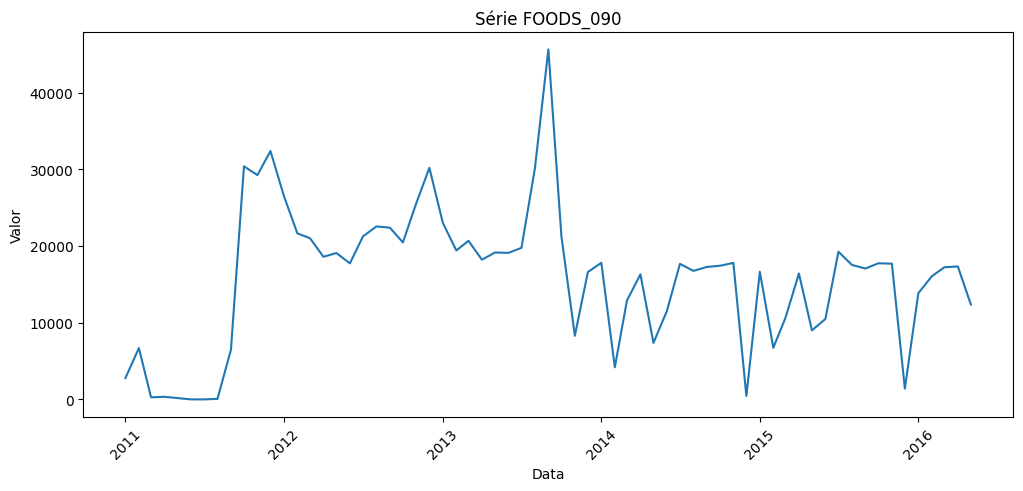

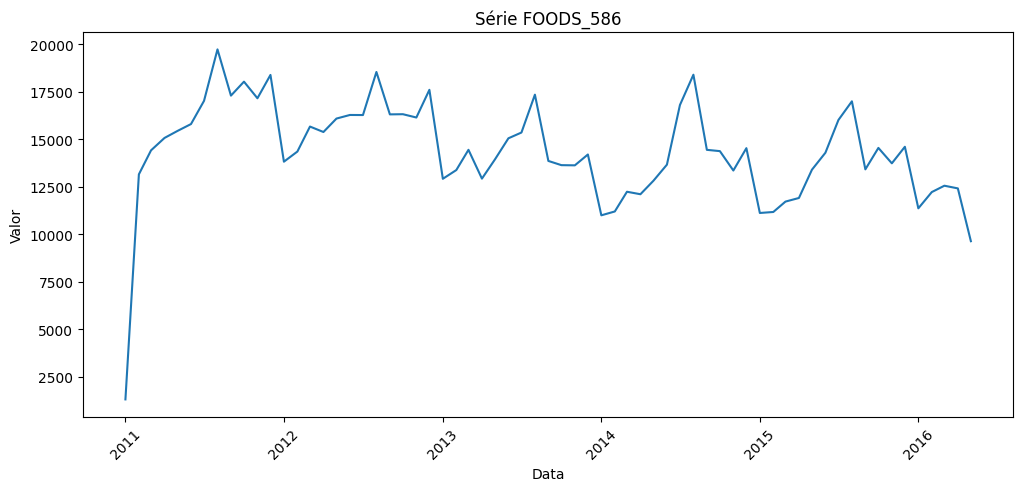

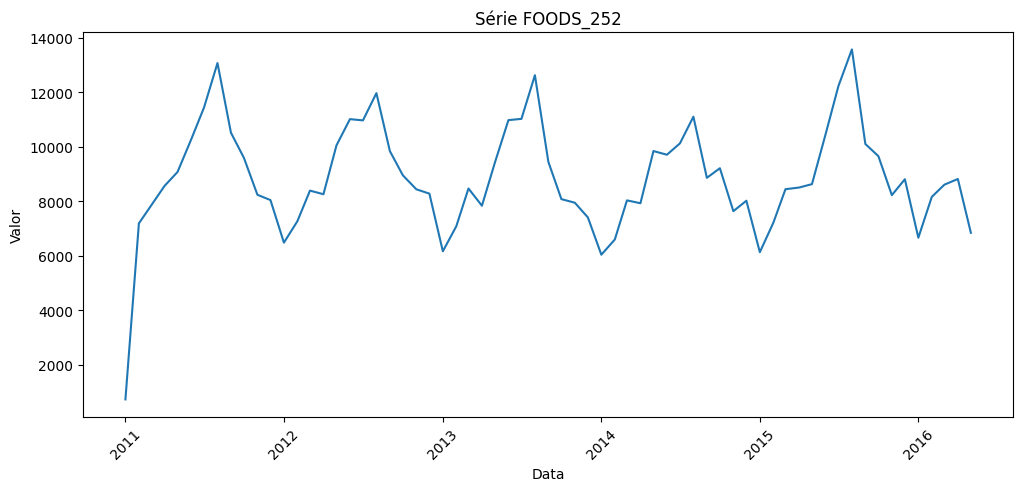

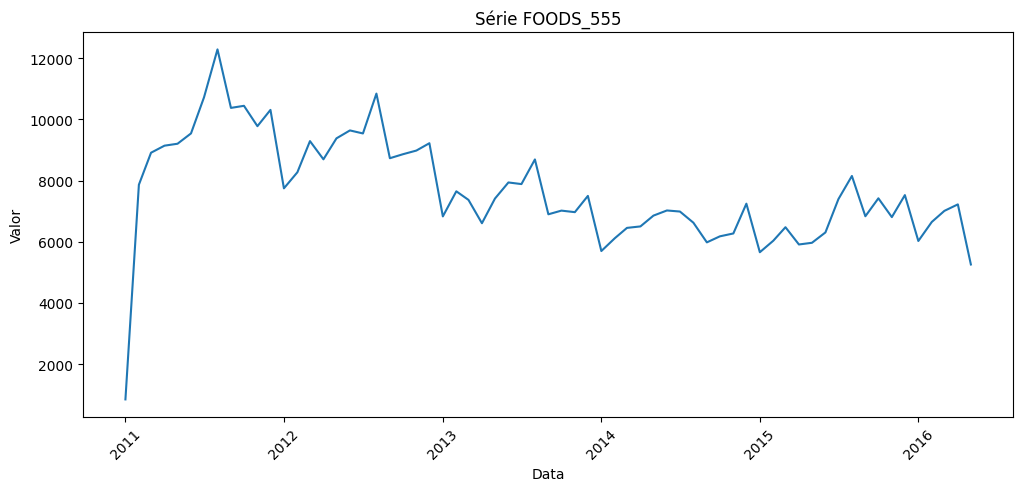

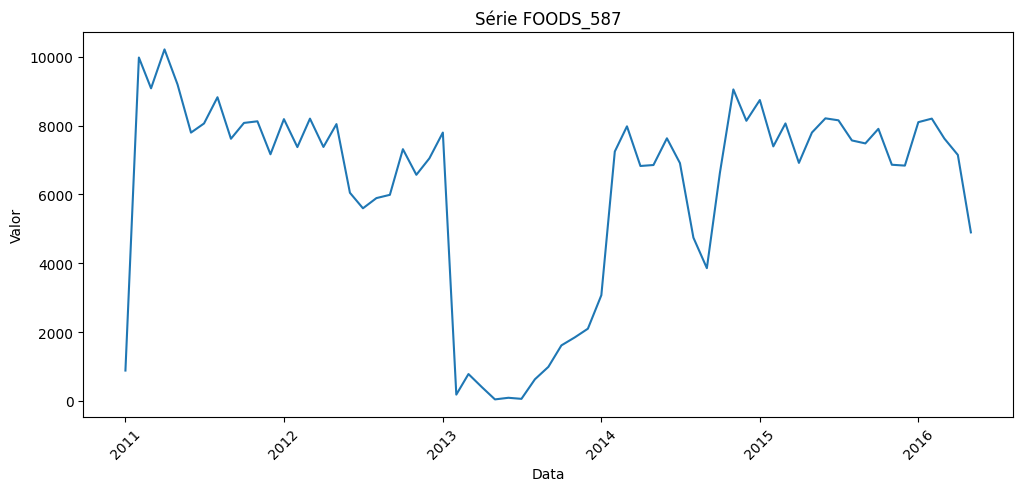

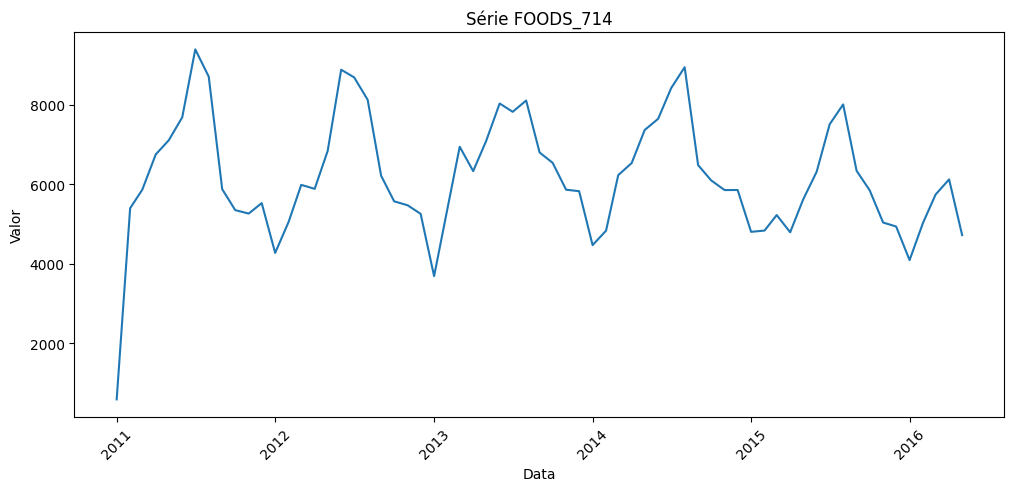

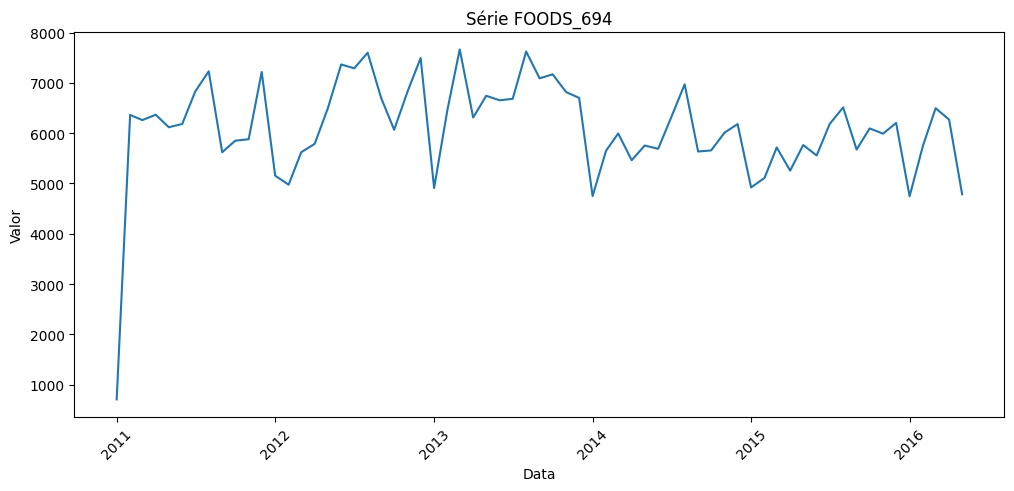

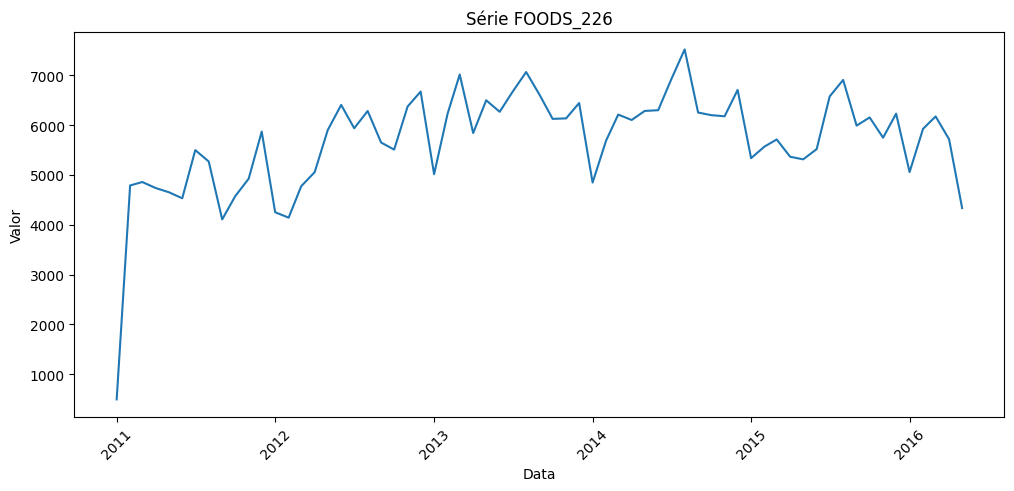

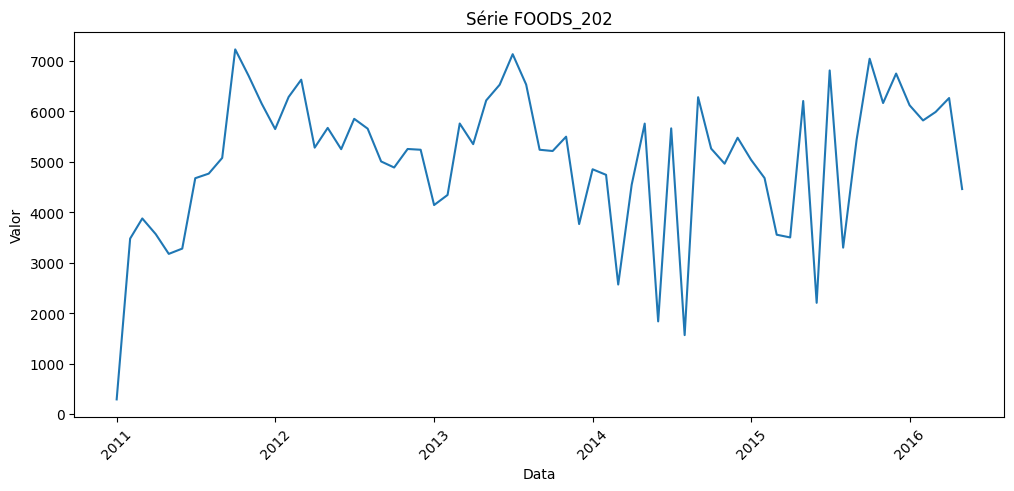

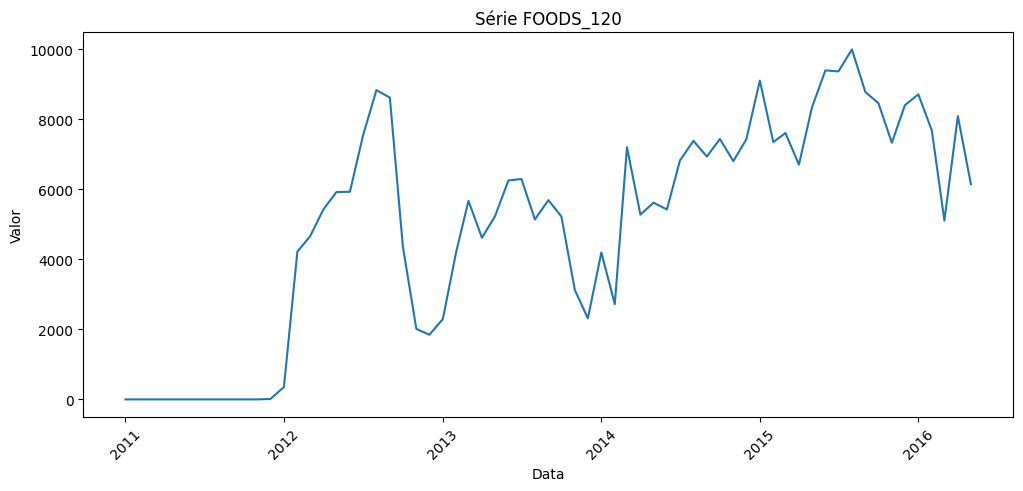

In [19]:
# Função para plotar séries temporais
def plot_item_series_cat(item, df):
    # Agrupar dados
    df_grouped = df.groupby(['item_id', 'year_month'])['value'].sum().reset_index()
    df_grouped['year_month'] = df_grouped['year_month'].dt.to_timestamp()

    # Filtrar dados para o item específico
    df_grouped_item = df_grouped[df_grouped['item_id'] == item].set_index('year_month')
    df_grouped_item = df_grouped_item.sort_values(by='year_month')

    plt.figure(figsize=(12, 5))
    plt.plot(df_grouped_item.index, df_grouped_item['value'])

    plt.title(f'Série {item}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)
    plt.show()

# Converter coluna 'date' para datetime e criar coluna 'year_month'
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

# Aplicar função de remoção de caracteres no 'item_id'
df['item_id'] = df['item_id'].apply(remover_dois_apos_sublinhado)

# Plotar séries temporais para cada item na lista
for item in top_10_foods_itens:
    plot_item_series_cat(item, df)